# Dimensionality Reduction on <font color=gray>Linear Data</font> using <font color=red>PCA </font>

We apply __Principal Component Analysis (PCA)__ to reduce the number of features. We've already baselined with original set of features in <a href='http://localhost:8888/notebooks/Exercises/Ex_MachineLearning/Pluralsight/Reducing%20Complexity%20in%20data/Baseline%20Regression%20Model.ipynb'/>Baseline Regression Model</a>. After reducing the features using PCA, we fit a regression model to the data and compare with baseline.

__<font color=red>Principal Component Analysis (PCA)</font>__ chooses axis to __maximize the variance__ in the underlying __data__.

__Linear Discriminant Analysis (LDA)__ re-orients data to __preserve__ the __separation__ of __clustered data points__. It is done by __maximizing the distance__ between points of different __categories__.

<img src='Data/PCA vs LDA.png' width=500/>

<img src='Data/Projection in Dimensionality Reduction.png' width=500/>

In [1]:
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
boston_df = pd.read_csv('Data/boston.csv')
boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
features = list(boston_df.columns[:-1])
features

['crime rate',
 'residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'number of rooms',
 'age',
 'distances to employment centres',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio',
 'lower income levels']

In [4]:
len(features)

12

In [5]:
from sklearn.decomposition import PCA

# n - no. of features PCA to retain
def apply_pca(X, n, add_constant=False):
    pca = PCA(n_components=n)
    x_new = pca.fit_transform(X)
    
    if (add_constant is True):
        x_new = sm.add_constant(x_new)

    return pca, pd.DataFrame(x_new)

In [6]:
pca, _ = apply_pca(boston_df[features], len(features))

The __Explained Variance Ratio__ shows how much of __variance is captured__ in each __principal component__.

In [7]:
print('Explained Variance = ', pca.explained_variance_ratio_)

Explained Variance =  [8.06472319e-01 1.63263761e-01 2.11990226e-02 6.95326869e-03
 1.26735934e-03 4.63799690e-04 2.49006281e-04 8.91418784e-05
 3.11906967e-05 9.47629975e-06 1.57387324e-06 8.01598537e-08]


Obseravations:
- As we have 12 features, we have 12 principal components

In [8]:
sum(pca.explained_variance_ratio_)

1.0

([<matplotlib.axis.XTick at 0x27a51ddaeb8>,
 <a list of 12 Text major ticklabel objects>)

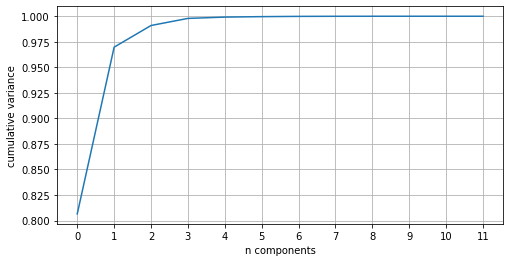

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.grid(True)
plt.xlabel('n components')
plt.ylabel('cumulative variance')
plt.xticks(range(0, len(pca.explained_variance_ratio_)))

Observations:
- First 3 principal components captured majority of variance

In [10]:
def build_model(regression_fn, target, features, dataset, *hyperparameters):
    X = dataset[features]
    Y = dataset[target]
    
    _, X_new = apply_pca(X, *hyperparameters)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    return {
        'x_initial'   : X,
        'x_transform' : X_new,
        'x_train'     : x_train,
        'x_test'      : x_test,
        'y_train'     : y_train,
        'y_test'      : y_test,
        'y_pred'      : y_pred,
        'model'       : model
    }    

__Ordinary Least Squares(OLS)__ Regression model from __Statsmodel__

- It is a technique of fitting a regression to data __analytically__ (not using machine learning techniques)

In [11]:
def ols_reg(x_train, y_train):
    ols = sm.OLS(y_train, x_train)
    model = ols.fit()

    return model

__Linear Regression__ model from __Scikit Learn__

- It is a technique of fitting a regression to data using __machine learning__ techniques

In [12]:
def linear_reg(x_train, y_train):
    lr = LinearRegression()
    model = lr.fit(x_train, y_train)

    return model

<font color=red>Let us fit __Ordinary Least Squares (OLS)__ regression and __calculate the metrics__ on reduced features using __PCA__ </font>

In [13]:
model_params = {}

# 4 refers to the no. of components which cover maximum variance underlying data
# True indicates 'add constant' (applicable for ols regression but not for scikit learn's linear regression)

model_params['statsmodel_reg'] = build_model(ols_reg, 'Median Home Value', features, boston_df, 4, True)

<img src='Data/pca_components.png' width=500/>

In [14]:
# Collect parameters

model       = model_params['statsmodel_reg']['model']
x_initial   = model_params['statsmodel_reg']['x_initial']
x_transform = model_params['statsmodel_reg']['x_transform']
x_train     = model_params['statsmodel_reg']['x_train']
x_test      = model_params['statsmodel_reg']['x_test']
y_train     = model_params['statsmodel_reg']['y_train']
y_test      = model_params['statsmodel_reg']['y_test']
y_pred      = model_params['statsmodel_reg']['y_pred']

In [15]:
# Note that out of 5 features 
#     4 are features (as we've hinted through principal components as 4)
#     1 is  extra constant that we've added for OLS
x_transform.shape

(506, 5)

In [16]:
# Original feature set

x_initial

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [17]:
# Transformed feature set (Note the 0th feature is the extra constant that we added as a requirement of OLS)

x_transform

,0,1,2,3,4
0,1.0,-119.674346,-5.536052,-3.628084,5.544264
1,1.0,-168.856073,10.106239,-30.875927,1.470963
2,1.0,-169.159750,14.101220,-17.285658,-9.967382
3,1.0,-190.058669,18.326938,-7.098267,-19.376160
4,1.0,-190.016627,16.108056,-13.517569,-13.973011
...,...,...,...,...,...
501,1.0,-138.667327,5.774211,-21.054744,-5.596122
502,1.0,-139.460714,1.034800,-26.937597,-0.702693
503,1.0,-138.264871,0.952609,-37.781254,8.483775
504,1.0,-137.401952,4.261812,-36.406319,7.380573


<font color=red>I think Janani Ravi skipped showing which features are retained by the PCA and continued comparing the distribution of data in the orginal set and transformed set. In my opinion we need to know which features are retained and should compare the corresponding feature sets.</font>

Text(0, 0.5, 'X[1] Residential Land Zone')

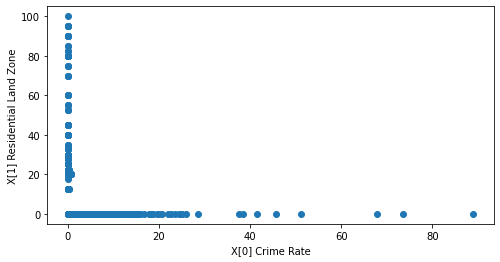

In [18]:
# A glance over orginal feature distribution of 'Crime Rate' and 'Residential Land Zone'

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x_initial['crime rate'], x_initial['residential land zone'], cmap='Spectral')

plt.xlabel('X[0] Crime Rate')
plt.ylabel('X[1] Residential Land Zone')

Observations:
- We can find that these two features are clustered together

Text(0, 0.5, 'Principal Component 2')

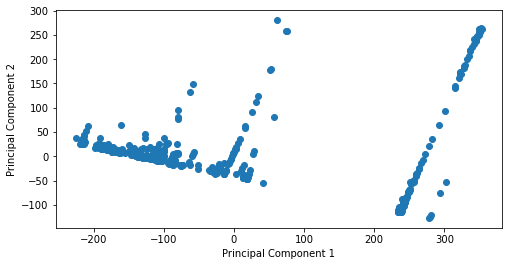

In [19]:
# A glance over transformed feature distribution of 'first two principal components'
# Note: x_transform[0] is the constant that we've added to OLS

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x_transform[1], x_transform[2], cmap='Spectral')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Observations:
- Notice that the data is distributed widely indicating that lot of variance is captured

In [20]:
# Let us now see the metrics for OLS

print('R squared: ', model.rsquared)
print('Adjusted R squared: ', model.rsquared_adj)

R squared:  0.9229677001048389
Adjusted R squared:  0.9206095684753952


<font color=red>Let us fit __Scikit Learn's Linear Regression__ and __calculate the metrics__ on reduced features using __PCA__ </font>

In [21]:
# 4 refers to the no. of components which cover maximum variance underlying data

model_params['sklearn_reg'] = build_model(linear_reg, 'Median Home Value', features, boston_df, 4)

<img src='Data/pca_components.png' width=500/>

In [22]:
# Collect parameters

model       = model_params['sklearn_reg']['model']
x_initial   = model_params['sklearn_reg']['x_initial']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

In [23]:
# Note that 4 are features (as we've hinted through principal components as 4)

x_transform.shape

(506, 4)

In [24]:
# Original feature set

x_initial

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [25]:
# Transformed feature set (Note the 0th feature is the extra constant that we added as a requirement of OLS)

x_transform

,0,1,2,3
0,-119.674346,-5.536052,-3.628084,5.544264
1,-168.856073,10.106239,-30.875927,1.470963
2,-169.159750,14.101220,-17.285658,-9.967382
3,-190.058669,18.326938,-7.098267,-19.376160
4,-190.016627,16.108056,-13.517569,-13.973011
...,...,...,...,...
501,-138.667327,5.774211,-21.054744,-5.596122
502,-139.460714,1.034800,-26.937597,-0.702693
503,-138.264871,0.952609,-37.781254,8.483775
504,-137.401952,4.261812,-36.406319,7.380573


Text(0, 0.5, 'Principal Component 2')

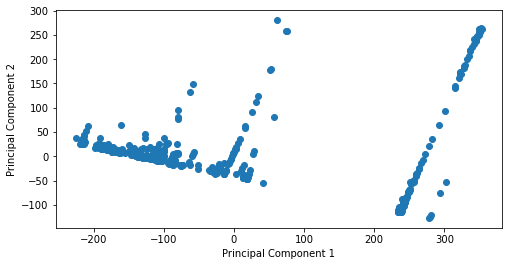

In [26]:
# A glance over transformed feature distribution of 'first two principal components'
# Note: Difference between OLS and Scikit Learn's Linear Regression
# In OLS, we had to skip 0th principal component and pick 1st and 2nd for graphical view (as 0th is constant we added)
# In Linear Regression, we can take 0th and 1st principal components

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x_transform[0], x_transform[1], cmap='Spectral')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [28]:
# Let us now see the metrics for Scikit's Linear Regression

print('Training Score: ', model.score(x_train, y_train))
print('Testing Score: ', r2_score(y_test, y_pred))

Training Score:  0.6619259963914251
Testing Score:  0.6330734417980978


__Thus we've reduced features using PCA and applied analytical OLS and Scikit's machine learning Linear Regression.__